# Part 2

## 1.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import dataframe
path = r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis'
ords_prods_merge= pd.read_pickle(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\full_customers.pkl')

## 2.

### Bar Chart

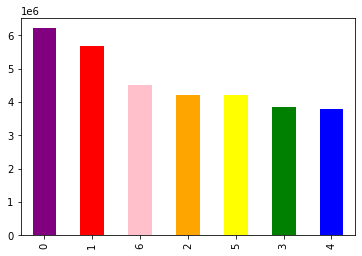

In [3]:
#create bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

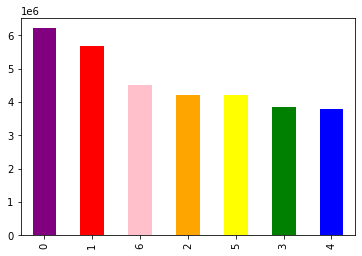

In [4]:
#save bar chart
bar= ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
#export bar chart
bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\full_bar_orders_dow.png')

### Histogram

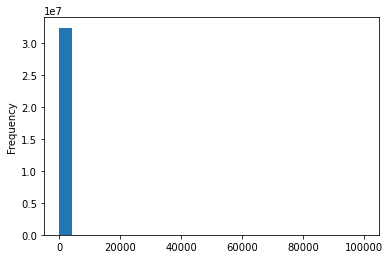

In [7]:
#create histogram
ords_prods_merge['prices'].plot.hist(bins=25)

In [8]:
#check values to better understand plot
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

### Scatterplot

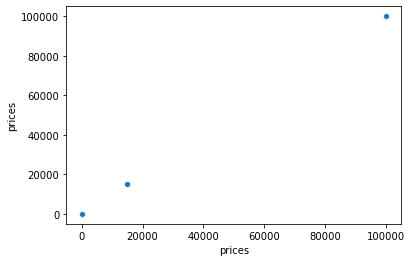

In [12]:
#create scatterplot
#plot values against themselves to check for outliers
sns.scatterplot(x='prices', y='prices', data= ords_prods_merge)

In [13]:
#We can see 2 possible outliers, we know the 999,999 but what about the value nearing 20,000?
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,behavior_flag,first_name,last_name,gender,state,age,date_joined,dependents,marital_status,income
7816,1435153,1519,26,2,11,6.0,Returning Customer,21553,15,0,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7817,1066435,1519,32,3,10,5.0,Returning Customer,21553,28,1,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15172,1697208,2409,33,1,19,5.0,Returning Customer,21553,1,0,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20294,965345,3531,27,2,19,8.0,Returning Customer,33664,2,0,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20528,2943740,3793,1,2,9,NaN,New Customer,21553,3,0,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333019,3265389,51346,4,1,17,13.0,Returning Customer,33664,2,1,...,Regular customer,NaN,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32337105,1179092,131671,12,4,9,15.0,Returning Customer,33664,1,0,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32340034,1226705,39667,7,2,15,20.0,Returning Customer,33664,14,0,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32359285,3000037,95105,2,4,19,22.0,Returning Customer,33664,4,0,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [15]:
#Until we further understand these values lets mark them as missing to preserve the analysis
ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices']= np.nan

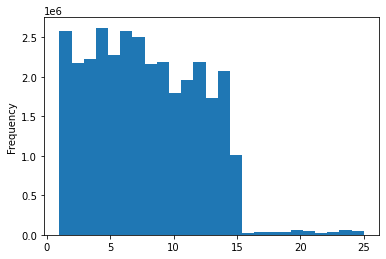

In [18]:
#re-run histogram
hist= ords_prods_merge['prices'].plot.hist(bins = 25)

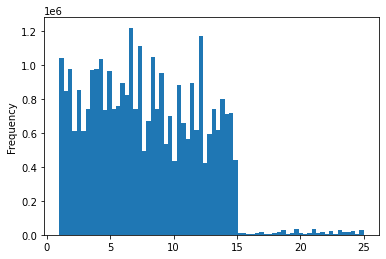

In [59]:
#increase bin number to better view the data
price_distribution= ords_prods_merge['prices'].plot.hist(bins = 70)

### Line Chart

In [26]:
#dataset is too large so we must sample
np.random.seed(4)
dev= np.random.rand(len(ords_prods_merge))<=0.7

In [27]:
#separate the random variables, 70% in big, 30% in small
big= ords_prods_merge[dev]
small= ords_prods_merge[~dev]

In [28]:
#do these random variables represent the original set?
len(ords_prods_merge)

32434212

In [29]:
len(big)+ len(small)

32434212

In [61]:
#reduce sample to necessary variables to reduce processing time
df_2= small[['orders_day_of_week', 'prices']]

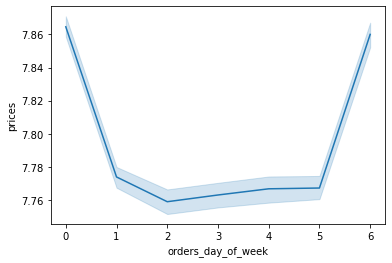

In [62]:
#view development of prices over the week days as line chart
product_prices_over_week_line= sns.lineplot(data= df_2, x= 'orders_day_of_week', y= 'prices')

## 3.

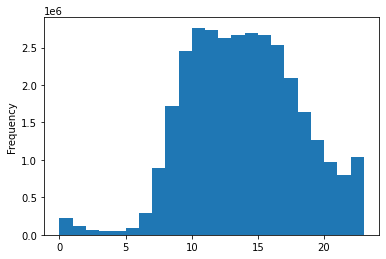

In [65]:
#order_hour_of_day histogram
orders_by_hour_hist=ords_prods_merge['order_hour_of_day'].plot.hist(bins=23)

This histogram displays how many orders occured on each hour.

## 4.

In [ ]:
#loyalty bar chart

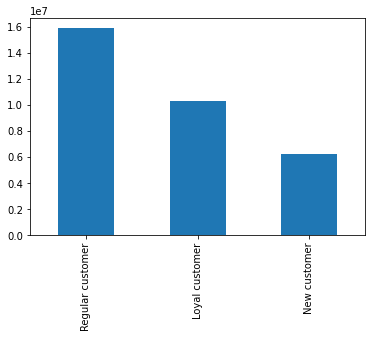

In [64]:
loyalty_amounts_bar= ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

There are more orders from regular customers than loyal or new customers.

## 5.

In [ ]:
#line chart of prices sample

In [37]:
#dataset is too large so we must sample
np.random.seed(4)
dev= np.random.rand(len(ords_prods_merge))<=0.7

In [38]:
#separate the random variables, 70% in big, 30% in small
big= ords_prods_merge[dev]
small= ords_prods_merge[~dev]

In [39]:
#do these random variables represent the original set?
len(ords_prods_merge)

32434212

In [40]:
len(big)+ len(small)

32434212

In [47]:
#reduce sample to necessary variables to reduce processing time
df_3= small[['order_hour_of_day', 'prices']]

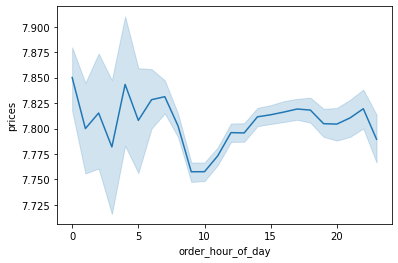

In [66]:
#view development of prices over the week days as line chart
price_by_hour_line= sns.lineplot(data= df_3, x= 'order_hour_of_day', y= 'prices')

## 6.

In [50]:
# exploring connection between age and family status
#line chart of age and number of dependents
df_4= small[['dependents', 'age']]

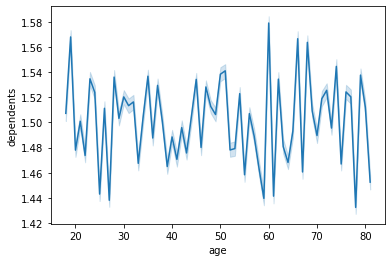

In [52]:
age_dependents_line= sns.lineplot(data= df_4 , y= 'dependents', x= 'age')

The line chart of the relationship of number of dependents and age has a lot of volitility. There are many rises and falls over the rage of years. Not much information can be gleaned from this.

## 7.

In [53]:
#explore connection between age and spending power
#scatterplot of age and order total
ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'customer_status',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_category', 'spending_flag', 'behavior_category',
       'behavior_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'dependents', 'marital_status', 'income'],
      dtype='object')

In [56]:
df_5= small[['age', 'prices']]

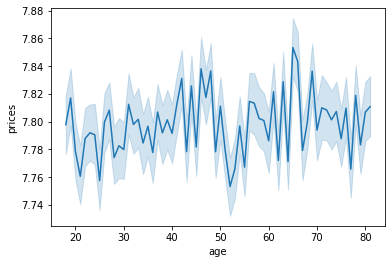

In [58]:
age_spending_line= sns.lineplot(data= df_5 , y= 'prices', x= 'age')

Spending power rises and falls throughout the ages, hitting its peak around the late 40's and late 60's with the lowest point in the 50's.

## 8.

In [67]:
#export visualization
bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\bar_orders_dow_new.png')

price_distribution.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\price_distribution.png')

product_prices_over_week_line.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\product_prices_over_week_line.png')

orders_by_hour_hist.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\orders_by_hour_hist.png')

loyalty_amounts_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\loyalty_amounts_bar.png')

price_by_hour_line.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\price_by_hour_line.png')

age_dependents_line.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\age_dependents_line.png')

age_spending_line.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\age_spending_line.png')
